# Problem

In this practical, you will perform a simple Bayesian analysis in order to learn about an underlying population quantity from a sample. The unknown quantity of interest will be the proportion of people, $p \in [0, 1]$, who plan to vote for the Labour Party at the next election. The data will be the number $i$ who plan to vote Labour (or not) in a sample of size $n$ from the population. We are therefore interested in the distribution $P(p \mid i, n, K)$, where $K$ represents all our other knowledge. We will drop $K$ from now on for simplicity, but remember it is always there implicitly. 

To proceed, we must either model $P(p \mid i, n, K)$ directly, or re-express it in terms of other probabilities that are easier to model. In this case, the latter is easier, for the reasons discussed in lectures: we can imagine that we know something about $p$ from previous data, and that we have an understanding of how the sample was taken. We therefore rewrite $P(p \mid i, n, K)$ using Bayes' theorem:

$$
P(p \mid i, n) = \frac{P(i \mid p, n)\: P(p \mid n)}{P(i \mid n)}
$$

Note that $P(i \mid n)$ does not depend upon $p$ and that $P(p \mid n) = P(p)$. Hence, we can write

$$
P(p \mid i, n) = P(i \mid p, n)\: P(p)
$$

with the constant determined by normalization. To obtain the left-hand side, we must first create models $P(p)$ for our knowledge of $p$ in the absence of the data (the 'prior'), and $P(i \mid p, n)$ for how the data is generated (the 'likelihood'). We then multiply them together, and extract information computationally. Since this is a computer practical, we will discretize the range $[0, 1]$ of $p$, evaluate the prior and the likelihood for these discrete values, multiply them together, and then normalize the results so that they sum to 1. This will give us a plot of the whole distribution $P(p \mid i, n, K)$. 

## The data model (likelihood)

Suppose we take a sample of 12 people from the population and we find that 7 are planning to vote Labour, and 5 are not. Thus $n = 12$ and $i = 7$. If knowledge of how one person plans to vote does not tell us anything about how the others are planning to vote given that we know $p$ (true if we know nothing about the people involved), then the individual votings plans are independent. Thus we have that  

$$ 
P(i \mid p, n) = \binom{n}{i}\: p^{i} \: (1-p)^{n-i}
$$

i.e. binomial with parameters $p$ and $n$.

##### Question

Express the likelihood of our 12 person sample in terms of p.

$$
P(7 \mid p, 12) = \binom{12}{7}\: p^{7}\:(1 - p)^{5}
$$

##### Question

Use the `choose` function in R to calculate $\binom{12}{7}$.

In [8]:
choose(12, 7)

[1] 792

##### Question

Write an R function called `like` with one argument, `p`, that computes and returns the likelihood of our 12 person sample.

In [9]:
like = function(p){
    
    n = 12
    i = 7
    comb = choose(12, 7)
    
    P = comb * p^(i) * (1 - p)^(n - i)
    
    return(P)
}

## The prior

We will consider two people, A and B, with different states of knowledge about $p$.  First we consider person A. 

### Person A

Based on reading the Guardian, A believes that $p$ is large, and that the probability of a given proportion $p$ is proportional to $p^{2}$.

##### Question

Write a function to evaluate $P(p \mid A) up to a multiplicative constant. 

In [10]:
 priorA = function(p){
     
     return(p^2)
 }

Note that as written, the function is not a probability distribution as it does not integrate to 1. However, we do not need to compute these constants as part of a Bayesian analysis in R, as we will be rescaling the answers to sum to 1 at the end anyway.



##### Question

How many times more probable does person A think that $p=0.8$ is than $p=0.2$?

In [11]:
priorA(0.8) / priorA(0.2)

[1] 16

## Combining the prior and the likelihood 

We now perform the Bayesian calculation by taking a number of $p$'s spanning the possible values of $p$, computing the likelihood of each of these values and  multiplying it by the prior. We then rescale the answers to sum to one to give us an idea of person A's posterior distribution for $p$.

##### Question

We will divide the range $[0, 1]$ of $p$ into $m$ intervals. Use R to define $dp = 1 / m$, and then create a sequence of values in $[0,1]$ separated by $dp$, and call it `ps`. Take $m = 50$ initially.

In [12]:
m = 50

dp = 1 / m

ps = seq(0, 1, by = dp)

##### Question

Apply the functions `priorA` and `like` to the vector `ps` and then multiply the answers element-wise. Multiply the result by $dp$ and store the resulting vector in `postAs`. Now normalize the vector `postAs` so that it  corresponds to a probability distribution. There is a subtlety here: what is it?

In [13]:
priorAs = priorA(ps)

likes = like(ps)

postAs = dp * likes * priorAs

postAs = postAs / sum(postAs)

##### Question

Now how much more probable does person A think that $p=0.8$ is than  p=0.2?

In [14]:
postAs[9] / postAs[3]

[1] 134456

##### Question

Plot `ps` ($x$-axis) against `postAs` ($y$-axis) as a line. Give your plot a title and label the axes. Use the `plot` command to do this.

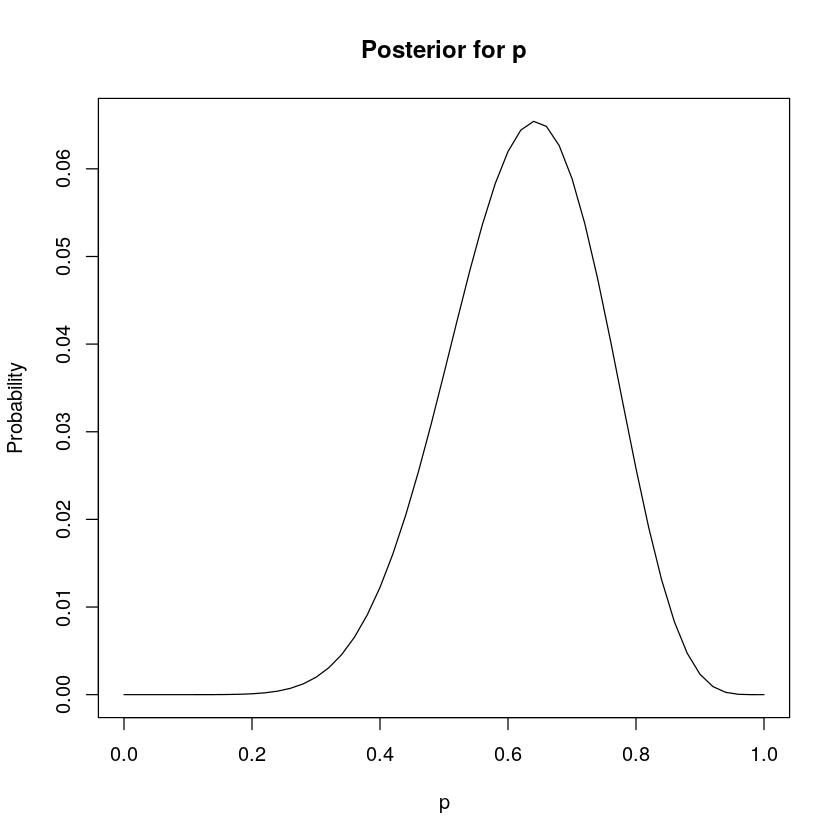

In [15]:
plot(ps, postAs, main = 'Posterior for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1)

##### Question

Normalize priorAs in the same way we did for the posterior, repeat the above plot, but now add the normalized values of priorAs to the plot as a dashed line. You will need to copy and past the plotting code above to the cell below. To add to a plot, use the `lines` command. The argument `lty =` an integer can be used to change the line type.

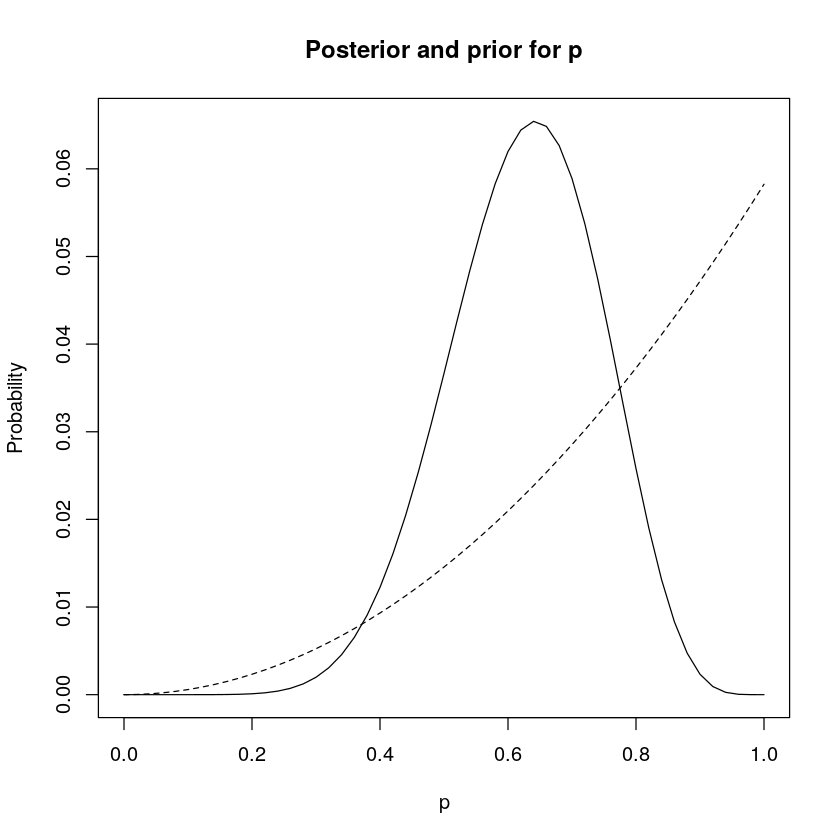

In [16]:
priorAs = priorAs / sum(priorAs)

plot(ps, postAs, main = 'Posterior and prior for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1)

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

### Person B

Now we consider person B. Based on reading the Telegraph, person B thinks that $p$ is probably small, and that the probability of a given proportion $p$ is proportional to $(1-p)^{2}$.

##### Question

Write a function to evaluate $P(p \mid B) up to a multiplicative constant, and compute the posterior probabilities for person B for the values in `ps` in the same way as we did for person A. Call them `postBs`.

In [17]:
priorB = function(p){

    return((1 - p)^2)

} 

priorBs = priorB(ps)

postBs = dp * likes * priorBs

postBs = postBs / sum(postBs)

##### Question

Add the posterior probabilities to your picture as a dotted red line, together with a fourth, red dotted-dashed line, showing the (normalized) prior probabilities of person B.

Use the `legend` function to add an appropriate legend to the plot.

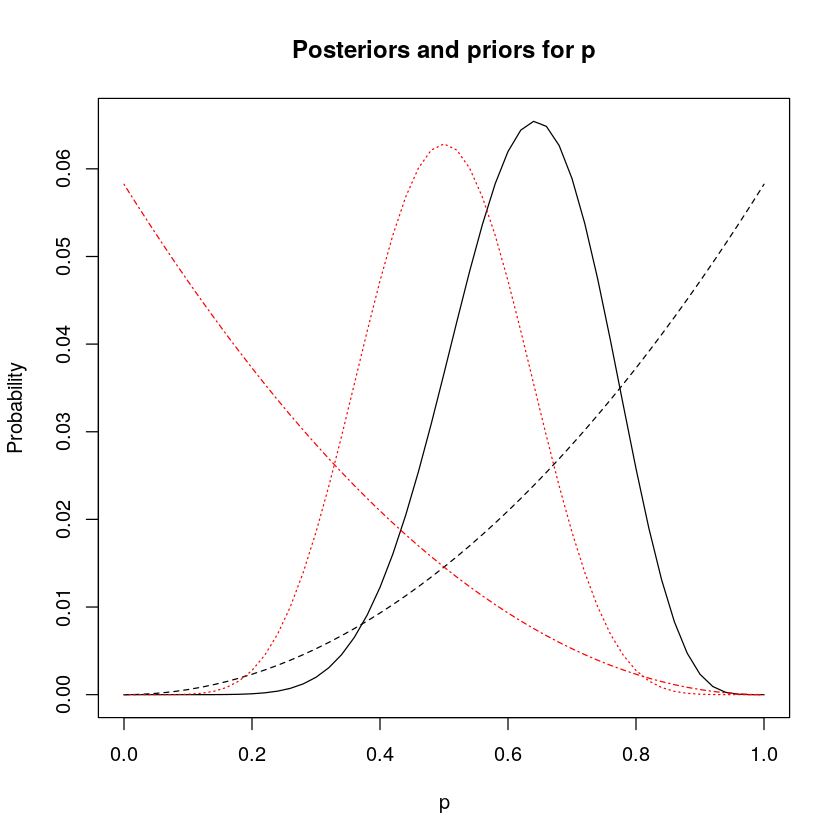

In [18]:
priorBs = priorBs / sum(priorBs)

plot(ps, postAs, main = 'Posteriors and priors for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1)

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

lines(ps, postBs, type = 'l', pch = 16, lty = 3, col = 'red')

lines(ps, priorBs, type = 'l', pch = 17, lty = 4, col = 'red')

legend(0, 0.3, legend = c('prior A', 'posterior A', 'prior B', 'posterior B'), 
       col = c('black', 'black', 'red', 'red'), lty = c(2, 1, 4, 3))

##### Question

What value $\hat{p}$ of $p$ maximizes the likelihood? Add a dashed vertical line to the graph at this value using `abline`. This 'maximum likelihood estimate' (MLE) is the usual classical statistics estimate of the value of $p$.

Let $L(i \mid p, n) = \ln P(i \mid p, n)$. Differentiating $L$ with respect to $p$ gives:

$$
{dL \over dp} = {i \over p} - {n - i \over 1 - p}
$$

Setting the result to zero gives $\hat{p} = i/n$. Differentiating again shows this is a maximum.

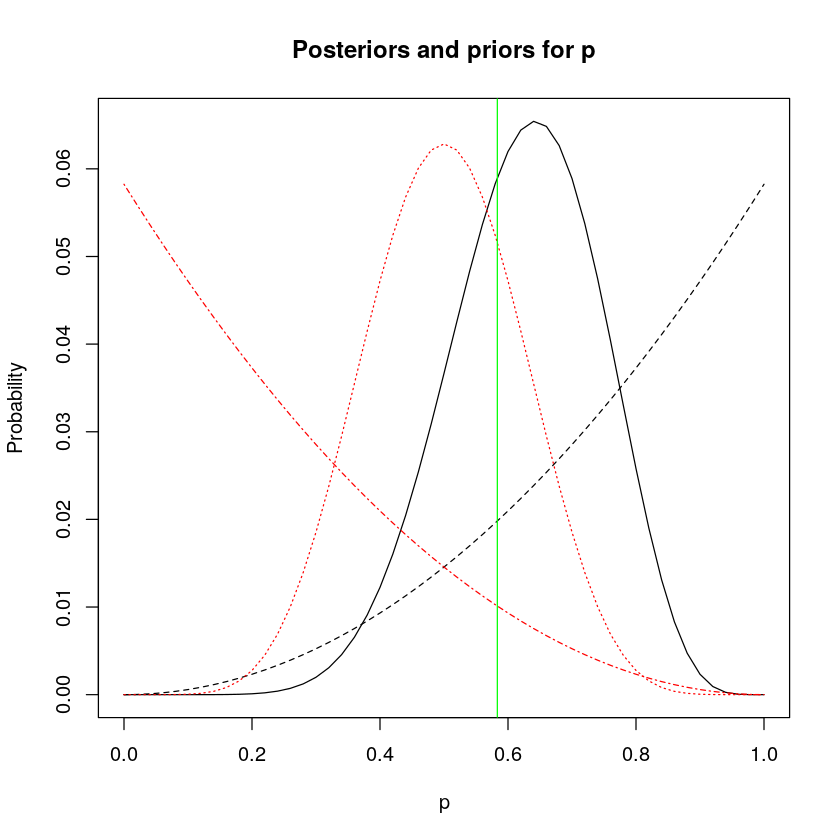

In [19]:
plot(ps, postAs, main = 'Posteriors and priors for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1)

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

lines(ps, postBs, type = 'l', pch = 16, lty = 3, col = 'red')

lines(ps, priorBs, type = 'l', pch = 17, lty = 4, col = 'red')

legend(0, 0.3, legend = c('prior A', 'posterior A', 'prior B', 'posterior B'), 
       col = c('black', 'black', 'red', 'red'), lty = c(2, 1, 4, 3))

abline(v = 7/12, col = 'green')

##### Question

Consider how the posterior distributions for persons A and B different. Is this what you would expect?

A's weighting towards higher $p$ has pulled the liklehood to the right, whereas the reverse is true of B. Their prior expectations change their conclusions. Prior probabilities, which effectively premises of an argument, should be based in more objective criteria than an impression from a newspaper. We discuss some of these in lectures.

# Updating beliefs with larger samples 

As the sample size becomes larger, the prior probability becomes dominated by the likelihood, and the posterior becomes Gaussian. We shall see this in action now. Suppose we had sampled 1000 people and observed that 612 plan to vote Labour at the next election.

##### Question

Rewrite the previous likelihood function with extra arguments $i$ and $n$. Setting $i = 612$ and $n = 1000$, reproduce the 
previous plot, using $m = 500$ to increase the resolution, and including the new MLE and the legend.

Zoom in to the central part of the figure in the interval $[0.5,0.7]$ using the `xlim` argument for the plot function. What do you observe?

In [ ]:
# Define the general likelihood function.

genLike = function(p, i, n){
    
    comb = choose(n, i)
    
    P = comb * p^(i) * (1 - p)^(n - i)
    
    return(P)
}

# Compute the likelihoods for the larger sample and then the new posteriors.

m = 500

dp = 1 / m

ps = seq(0, 1, by = dp)

priorAs = priorA(ps)

priorAs = priorAs / sum(priorAs)

priorBs = priorB(ps)

priorBs = priorBs / sum(priorBs)

i = 612

n = 1000

newLikes = genLike(ps, i, n)

postAs = dp * newLikes * priorAs

postAs = postAs / sum(postAs)

postBs = dp * newLikes * priorBs

postBs = postBs / sum(postBs)

# Make the plots.

plot(ps, postAs, main = 'Posteriors and priors for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1)

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

lines(ps, postBs, type = 'l', pch = 16, lty = 3, col = 'red')

lines(ps, priorBs, type = 'l', pch = 17, lty = 4, col = 'red')

legend(0, 0.3, legend = c('prior A', 'posterior A', 'prior B', 'posterior B'), 
       col = c('black', 'black', 'red', 'red'), lty = c(2, 1, 4, 3))

abline(v = i/n, col = 'green')

# Repeat the plots but 'zoomed' in.

plot(ps, postAs, main = 'Zoom of posteriors and priors for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1, 
     xlim = c(0.5, 0.7))

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

lines(ps, postBs, type = 'l', pch = 16, lty = 3, col = 'red')

lines(ps, priorBs, type = 'l', pch = 17, lty = 4, col = 'red')

legend(0, 0.3, legend = c('prior A', 'posterior A', 'prior B', 'posterior B'), 
       col = c('black', 'black', 'red', 'red'), lty = c(2, 1, 4, 3))

abline(v = i/n, col = 'green')

##### Question

Derive the form of the posterior distribution for $p$ for person's A and B by considering the general form P(p) \propto p^{a - 1}\: (1 - p)^{b - 1}. (Note that person A corresponds to $a = 3$, $b = 1$; person B to $a = 1$, $b = 3$.) 

As the size $n$ of the sample increases with $i/n$ constant, show that the the prior becomes irrelevant. 

At the same time, the posterior becomes increasingly Gaussian (you do not have to show this). Derive the limiting mean and standard deviation of this Gaussian by considering those of a beta distribution.

Dropping multiplicative constants that do not depend on $p$, we have

$$
P(p \mid i, n) \propto p^{i + a - 1}\: (1 - p)^{n - i + b - 1}
$$

As $n$ and $i$ become larger, the exponents increasingly approximate $i$ and $n - i$, i.e. the likelihood values. The values of $a$ and $b$ become increasingly irrelevant. 

The posterior has the form of a beta distribution. The mean and variance of a beta distribution are given by:
$$
\begin{align*}
\mu & = {\alpha \over \alpha + \beta} \\
v & = {\alpha\beta \over (\alpha + \beta)^{2}\: (\alpha + \beta + 1)}
\end{align*}
$$

Substituting the above values and taking the large $n$ limit then gives:
$$
\begin{align*}
\mu & = {i \over n} \\
v & = {i \: (n - i) \over n^{3}} = {\mu\: (1 - \mu) \over n}
\end{align*}
$$

Note that $\mu = \hat{p}$.

##### Question

Use the function `dnorm` applied to vector `ps`, with the above mean and standard deviation, to calculate the normal density at each point in `ps`, then convert to probabilities by multiplying by $dp$. Assign these values to a vector called `nprobs`, and add it to your plot in a different colour and line type. 

In [ ]:
mu = i / n

v = mu * (1 - mu) / n

nprobs = dp * dnorm(ps, mu, sqrt(v))

# Repeat the plots but 'zoomed' in.

plot(ps, postAs, main = 'Zoom of posteriors and priors for p', xlab = 'p', ylab = 'Probability', type = 'l', lty = 1, 
     xlim = c(0.5, 0.7))

lines(ps, priorAs, type = 'l', pch = 2, lty = 2)

lines(ps, postBs, type = 'l', pch = 16, lty = 3, col = 'red')

lines(ps, priorBs, type = 'l', pch = 17, lty = 4, col = 'red')

legend(0, 0.3, legend = c('prior A', 'posterior A', 'prior B', 'posterior B', 'Gaussian'), 
       col = c('black', 'black', 'red', 'red', 'orange'), lty = c(2, 1, 4, 3, 5))

abline(v = i/n, col = 'green')

lines(ps, nprobs, type = 'l', pch = 17, lty = 5, col = 'orange')